# Figure R5 (results)
### Figure of simulated dissolved Pb residence time alongside observational estimates of Pb residence times

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mapping_functions import find_indeces_vector
from constants import imin, imax, jmin, jmax, isize, jsize, \
                      path_figure

%matplotlib inline

#### Load files:

In [2]:
# ANHA12 grid mesh:
mesh     = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
hdept    = mesh['hdept'].values[0,:,:]

# And the Pb model configuration ANHA12 mask:
mfile    = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20230213.nc')
mesh_lon = mfile['nav_lon'].values
mesh_lat = mfile['nav_lat'].values
mask     = mfile['tmask'].values[0]
mesh_bathy   = mfile['tmask'].values[0,:,:,:]
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
mesh_depth   = mfile['nav_lev'].values

In [3]:
# Observed Pb residence times:
# Pb residence time estimates from the literature: 
# integrations were performed simply by dividing the water column into intervals defined by the midpoints between sampling depths 
# and weighting each data point according to the depth interval it represented,

#-----------------------------------------------------------------------------------------------------------
# Kadko et al., 2018: collected August 20 - October 5, 2015 ---- residence time of dissolved Pb
kadko_lats      = np.array([76.511, 79.997, 83.755, 87.520, 88.407, 89.987, 87.815, 85.135, 82.491, 80.369, 78.180, 77.503, 76.998, \
                  76.505, 73.506, 73.008])
kadko_lons      = np.array([-173.034, -174.962, 174.915, -179.809, -176.761, -89.25, -149.734, -150.063, -149.872, -149.855, -147.831, -148.009, -148.803, \
                  -149.515, -156.808, -158.729])
kadko_depths    = np.array([56, 52, 52, 46, 20, 23, 45, 41, 47, 49, 40, 47, 40, 40, 46, 36])
kadko_res       = np.array([0.69, 0.76, 0.94, 0.24, 0.76, 0.27, 0.33, 0.71, 1.07, 0.65, 0.31, 0.36, 0.41, 0.28, 0.38, 0.18])
# Residence times are average based on the surface to the given depth, so calculate the average depth:
kadko_ave_depth = (kadko_depths + 0) / 2.
# Find indeces within ANHA12 domain
kadko_ANHA12_i, kadko_ANHA12_j = find_indeces_vector(kadko_lons, kadko_lats, mesh_lon, mesh_lat) 

#-----------------------------------------------------------------------------------------------------------
# Chen et al., 2012: Chukchi Sea / Bering Strait ---- residence time of Pb-210
chen_lats   = np.array([69.996, 73.998, 68.919, 70.495, 71.579, 71.261, 73.995, 73.380])
chen_lons   = np.array([-168.999, -168.991, -167.009, -162.976, -164.013, -150.376, -156.332, -151.883])
chen_depth  = np.array([30,40,10,30,40,20,30,100])
chen_res    = np.array([17,37,5,54,11,36,85,103])/365. # given initially in units of days
chen_ave_depth = np.array([13, 23.3, 5, 15, 22, 10, 15, 50]) # Average depth based on average of sampled depths listed in table 1
# Find indeces within ANHA12 domain
chen_ANHA12_i,  chen_ANHA12_j  = find_indeces_vector(chen_lons, chen_lats, mesh_lon, mesh_lat) 

#-----------------------------------------------------------------------------------------------------------
# Moore and Smith, 1986: Arctic Ocean ---- residence time of dissolved Pb-210
MS_ave_depth = [130., (50+0)/2., (1200+255)/2.] # first number is in the nutrient maximum
MS_restime   = [1.5, 5, 21] 

#-----------------------------------------------------------------------------------------------------------
# Smith et al., 2003: Arctic Ocean ---- residence time of dissolved Pb-210
smith_ave_depth = [(0+50)/2., (0+50)/2., (10+25+50)/3., (10+25+40+50)/4., (10+44)/2., (2000+2000+410)/3.]
smith_restime   = [0.1, 2.2, 0.3, 0.3, 1.0, 30] # range of values observed

#-----------------------------------------------------------------------------------------------------------
# Nozaki et al., 1976: Pacific Ocean ---- residence time of Pb-210
nozaki_restime   = [1.7]    
nozaki_ave_depth = [10./2]  # don't specify the depth in paper other than surface  
 
#-----------------------------------------------------------------------------------------------------------
# Nozaki et al., 1996: Bering Sea ---- residence time of Pb-210
Nozaki_1996_ave_depth = [(1442+1922+2588+3069+3547)/5., \
                         (1000+1250+1500+1750+2000+2250+2510+2963+3209+3456+3703+3950+4328+4576+4825+5073+5322+5570)/18.]
Nozaki_1996_restime   = [10, 52]

#-----------------------------------------------------------------------------------------------------------
# Chung and Craig, 1983: North Pacific  ---- residence time of Pb-210
Chung_ave_depth = [610, 3260, 4760]
Chung_restime   = [28, 52, 32]

#-----------------------------------------------------------------------------------------------------------
# Cochran et al., 1995: Arctic ---- residence time of Pb-210
Cochran_1995_ave_depth = [(1500+3000)/2.]
Cochran_1995_restime   = [19]

#-----------------------------------------------------------------------------------------------------------
# Cochran et al., 1990: North Atlantic and North Pacific ---- residence time of Pb-210
Cochran_1990_ave_depth = [(6092+0)/2., (3718+0)/2., (3324+0)/2., (3850+0)/2., (4476+0)/2., (2184+0)/2.]
Cochran_1990_restime   = [91, 30, 42, 48, 36, 22] # first value is north pacific

#-----------------------------------------------------------------------------------------------------------
# Baskaran et al., 2022: Arctic Ocean ---- residence time of total Pb-210
baskaran_2022_ave_depth = [(3925)/2., (2166)/2., (3781)/2., (1601)/2., (500)/2., (500)/2., (500)/2., (500)/2., (500)/2., (1919+2219)/2., (3517+3817)/2.]
baskaran_2022_restime   = [149, 60, 23, 11.2, 6.9, 4.9, 5.5, 4.6, 6.2, 21, 41]

#-----------------------------------------------------------------------------------------------------------
# Wangjiang et al., 2014: Arctic Ocean ---- residence time of dissolved Pb-210, sampled 2008, not certain about trustworthiness
wangjiang_2014_lons      = [-168-(59.1/60), -161-(58.9/60), -158-(57.69/60), -158-(19.5/60), -151-(59.7/60), -147-(3.36/60)]
wangjiang_2014_lats      = [71+(59.87/60), 71+(29.17/60), 72+(30.7/60), 72+(56.3/60), 74+(59.7/60), 85+(7.83/60)]
wangjiang_2014_ave_depth = [(40+0)/2.,(40+0)/2.,(40+0)/2.,(60+0)/2.,(60+0)/2.,(60+0)/2.]
wangjiang_2014_restime   = [1.06, 2.28, 1.09, 1.70, 7.49, 5.57]

#### Functions

In [4]:
def load_monthly_comp(folder, year, month):
    # Load monthly average simulated dissolved Pb concentration and scavenging removal for the specified folder, year, and month    
    comp = xr.open_dataset(f'{folder}ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}{month:02}-{year}{month:02}.nc')

    dpb      = comp['dissolpb'].values[0,:,:,:] # dissolved Pb concentration
    dpb_ads  = comp['dpbads'].values[0,:,:,:]   # scavenging removal
    
    return dpb, dpb_ads

In [5]:
def calc_annual_residence_time(folder, year):
    # Calculate annual dissolved Pb residence time assuming steady state
    
    dPb_total  = np.zeros((50,isize,jsize))
    scav_total = np.zeros((50,isize,jsize))
    for month in range(1,13):
        dPb, dPb_ads = load_monthly_comp(folder, year, month)
        dPb_total    = dPb_total  + dPb
        scav_total   = scav_total + dPb_ads 
    
    # Inventory of [dPb]:
    inventory = np.copy(dPb_total)
    
    # Removal rate of [dPb]:
    removal   = np.copy(scav_total)
    
    # Calculate residence time:
    res_time  = inventory / removal
    
    # Convert residence time from seconds to years:
    residence_time = res_time / (3600*24*365)
    
    return residence_time

In [6]:
def calc_summer_residence_time(folder, year):
    # similar as the annual function but estimate the dissolved Pb residence time based on the summer period
    
    dPb_total  = np.zeros((50,isize,jsize))
    scav_total = np.zeros((50,isize,jsize))
    for month in range(8,11):
        dPb, dPb_ads = load_monthly_comp(folder, year, month)
        dPb_total    = dPb_total  + dPb
        scav_total   = scav_total + dPb_ads 
    
    # Inventory of [dPb]:
    inventory = np.copy(dPb_total)
    
    # Removal rate of [dPb]:
    removal   = np.copy(scav_total)
    
    # Calculate residence time:
    res_time  = inventory / removal
    
    # Convert residence time from seconds to years:
    residence_time = res_time / (3600*24*365)
    
    return residence_time

In [7]:
def create_legend_sources(axis, markers, loc_leg=(0,0)):
    # make a legend containing the name and markers of each of the observational datasets
    
    color_g  = '#c1c1c1'
    markers  = ["o","s","<",">","v","P","3","^","*","D", "d"]
    
    s1,  = axis.plot([-20,-20], [0,0], '.', markeredgecolor='w', markeredgewidth=0.0, \
                     label=r'$\bf{Observations:}$', markersize=7, color='w')      
    s2,  = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='Kadko et al., 2019: Arctic', markersize=5, color=color_g, marker=markers[0])
    s3,  = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='*Baskaran et al., 2022: Arctic', markersize=5, color=color_g, marker=markers[1])
    s4,  = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='*Chen et al., 2012: Arctic, Bering', markersize=5, color=color_g, marker=markers[2])
    s5,  = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='*Chung and Craig, 1983: Pacific', markersize=5, color=color_g, marker=markers[3])
    s6,  = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='*Cochran et al., 1990: Atlantic, Pacific', markersize=5, color=color_g, marker=markers[4])
    s7,  = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='*Cochran et al., 1995: Arctic', markersize=5, color=color_g, marker=markers[5]) 
    s8,  = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='*Moore and Smith, 1986: Arctic', markersize=5, color=color_g, marker=markers[6])
    s9,  = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='*Nozaki et al., 1976: Pacific', markersize=5, color=color_g, marker=markers[7]) 
    s10, = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='*Nozaki et al., 1996: Bering', markersize=7, color=color_g, marker=markers[8])
    s11, = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='*Smith et al., 2003: Arctic', markersize=4, color=color_g, marker=markers[9])
    s12, = axis.plot([-20,-20], [0,0],'.', markeredgecolor='k', markeredgewidth=0.6, \
                     label='*Hu et al., 2014: Arctic', markersize=5, color=color_g, marker=markers[10]) 
    
    leg1 = fig.legend(handles=[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12], loc=loc_leg, fontsize=7, frameon=False)

    return leg1

In [8]:
def calc_regional_restime_profile(residence_time):
    # Function to calculate mean profiles of residence time for each of the 4 regions
    
    # Separate based on region:
    CB_residence_time  = np.ma.masked_where(CB_mask[:,imin:imax,jmin:jmax]!=1 , residence_time)
    CAA_residence_time = np.ma.masked_where(CAA_mask[:,imin:imax,jmin:jmax]!=1, residence_time)
    BB_residence_time  = np.ma.masked_where(BB_mask[:,imin:imax,jmin:jmax]!=1 , residence_time)
    LS_residence_time  = np.ma.masked_where(LS_mask[:,imin:imax,jmin:jmax]!=1 , residence_time)
    
    # and mask land:
    CB_residence_time  = np.ma.masked_where((mesh_bathy[:,imin:imax,jmin:jmax] < 0.1), CB_residence_time)
    CAA_residence_time = np.ma.masked_where((mesh_bathy[:,imin:imax,jmin:jmax] < 0.1), CAA_residence_time)
    BB_residence_time  = np.ma.masked_where((mesh_bathy[:,imin:imax,jmin:jmax] < 0.1), BB_residence_time)
    LS_residence_time  = np.ma.masked_where((mesh_bathy[:,imin:imax,jmin:jmax] < 0.1), LS_residence_time)

    # Calculate mean over each of the regions:
    CB_mean_restime    = np.ma.mean(CB_residence_time , axis=(1,2))
    CAA_mean_restime   = np.ma.mean(CAA_residence_time, axis=(1,2))
    BB_mean_restime    = np.ma.mean(BB_residence_time , axis=(1,2))
    LS_mean_restime    = np.ma.mean(LS_residence_time , axis=(1,2))

    mean_restime = {'CB':CB_mean_restime.filled(fill_value=np.nan), 'CAA':CAA_mean_restime.filled(fill_value=np.nan), \
                    'BB':BB_mean_restime.filled(fill_value=np.nan), 'LS':LS_mean_restime.filled(fill_value=np.nan)}
    return mean_restime

In [9]:
def plot_regional(axis, tau, colors, legend=True):
        
    s1 = axis.plot([-20,-20], [0,0], '.',  markeredgewidth=0.0, label=r'$\bf{Model:}$', markersize=0)  
    axis.plot(tau['LS'] , mesh_depth, color=colors[0], label='Labrador Sea' , linewidth=1.8, linestyle=(0,(1,1)))
    axis.plot(tau['BB'] , mesh_depth, color=colors[1], label='Baffin Bay'   , linewidth=1.8, linestyle='-')
    axis.plot(tau['CAA'], mesh_depth, color=colors[2], label='Canadian Arctic Archipelago', linewidth=1.8, linestyle='-')
    axis.plot(tau['CB'] , mesh_depth, color=colors[3], label='Canada Basin' , linewidth=1.8, linestyle=(0,(1,1)))
    
    # Manually set the position and relative size of the inset axes within ax1    
    axis.tick_params(labelsize=7, pad=0)
    axis.xaxis.tick_top()    
    axis.xaxis.set_label_position('top') 
    
    if legend:
        fig.legend(loc=(0.08, 0.3), fontsize=7, frameon=False)    
    return

#### Calculations

Create mask for different regions to create average profiles over:

In [10]:
# Average basin profiles for different regions 
# --- Canada Basin ---
CB_mask  = np.zeros(bathy_masked.shape)
CB_mask[:,imin+10:imax-10,jmin+10:jmax-20] = 1 # excluding the regions of boundary conditions
for depth in range(0,50):
    CB_mask[depth][mesh_lon > -80]   = 0
    CB_mask[depth][hdept < 2000]     = 0

CB_mask[mesh_bathy < 0.1] = 0

# --- CAA ---
CAA_mask = np.zeros(bathy_masked.shape)
CAA_mask[:,imin+10:imax-10,jmin+10:jmax-20] = 1 # excluding the regions of boundary conditions
for depth in range(0,50):
    CAA_mask[depth][hdept > 500]     = 0
    CAA_mask[depth][mesh_lon < -130] = 0
    CAA_mask[depth][mesh_lon > -60]  = 0
    CAA_mask[depth][mesh_lat < 67]   = 0
    CAA_mask[depth][(mesh_lat < 75) & (mesh_lon >-75)] = 0
    CAA_mask[depth][(mesh_lat < 71) & (mesh_lon <-70) & (mesh_lon > -85)] = 0
    
CAA_mask[mesh_bathy < 0.1] = 0

# --- Baffin Bay ---
BB_mask  = np.zeros(bathy_masked.shape)
BB_mask[:,imin+10:imax-10,jmin+10:jmax-20] = 1 # excluding the regions of boundary conditions
for depth in range(0,50):
    BB_mask[depth][mesh_lon < -75]   = 0
    BB_mask[depth][hdept < 1000]     = 0
    BB_mask[depth][mesh_lat <= 65]   = 0
    BB_mask[depth][mesh_lat > 80]    = 0

BB_mask[mesh_bathy < 0.1] = 0
    
# --- Labrador Sea ---
LS_mask  = np.zeros(bathy_masked.shape)
LS_mask[:,imin+10:imax-10,jmin+10:jmax-20] = 1 # excluding the regions of boundary conditions
for depth in range(0,50):
    LS_mask[depth][mesh_lon < -75]   = 0
    LS_mask[depth][mesh_lat > 65]    = 0
    LS_mask[depth][hdept < 2000]     = 0
    
LS_mask[mesh_bathy < 0.1] = 0

In [11]:
# Collect all observations into two lists:

all_obs_ave_depth = []
all_obs_ave_depth.extend(kadko_ave_depth)
all_obs_ave_depth.extend(baskaran_2022_ave_depth)
all_obs_ave_depth.extend(chen_ave_depth)
all_obs_ave_depth.extend(Chung_ave_depth)
all_obs_ave_depth.extend(Cochran_1990_ave_depth)
all_obs_ave_depth.extend(Cochran_1995_ave_depth)
all_obs_ave_depth.extend(MS_ave_depth)
all_obs_ave_depth.extend(nozaki_ave_depth)
all_obs_ave_depth.extend(Nozaki_1996_ave_depth)
all_obs_ave_depth.extend(smith_ave_depth)
all_obs_ave_depth.extend(wangjiang_2014_ave_depth)

all_obs_restime = []
all_obs_restime.extend(kadko_res)
all_obs_restime.extend(baskaran_2022_restime)
all_obs_restime.extend(chen_res)
all_obs_restime.extend(Chung_restime)
all_obs_restime.extend(Cochran_1990_restime)
all_obs_restime.extend(Cochran_1995_restime)
all_obs_restime.extend(MS_restime)
all_obs_restime.extend(nozaki_restime)
all_obs_restime.extend(Nozaki_1996_restime)
all_obs_restime.extend(smith_restime)
all_obs_restime.extend(wangjiang_2014_restime)

In [ ]:
# load and calculate annual residence time estimate: 
folder_base   = '/data/brogalla/run_storage/Pb-reference-202312/'
restime_array = np.zeros((50,isize,jsize))
for year in range(2002,2022):
    annual_restime = calc_annual_residence_time(f'{folder_base}Pb-reference-{year}-202312/', year)
    restime_array += annual_restime
    
ts_ave_restime      = restime_array / len(range(2002,2022))
ts_regional_restime = calc_regional_restime_profile(ts_ave_restime)

#### Figure:


In [13]:
color_regions = ['#23343f','#23343f', '#699dbd','#699dbd'] 

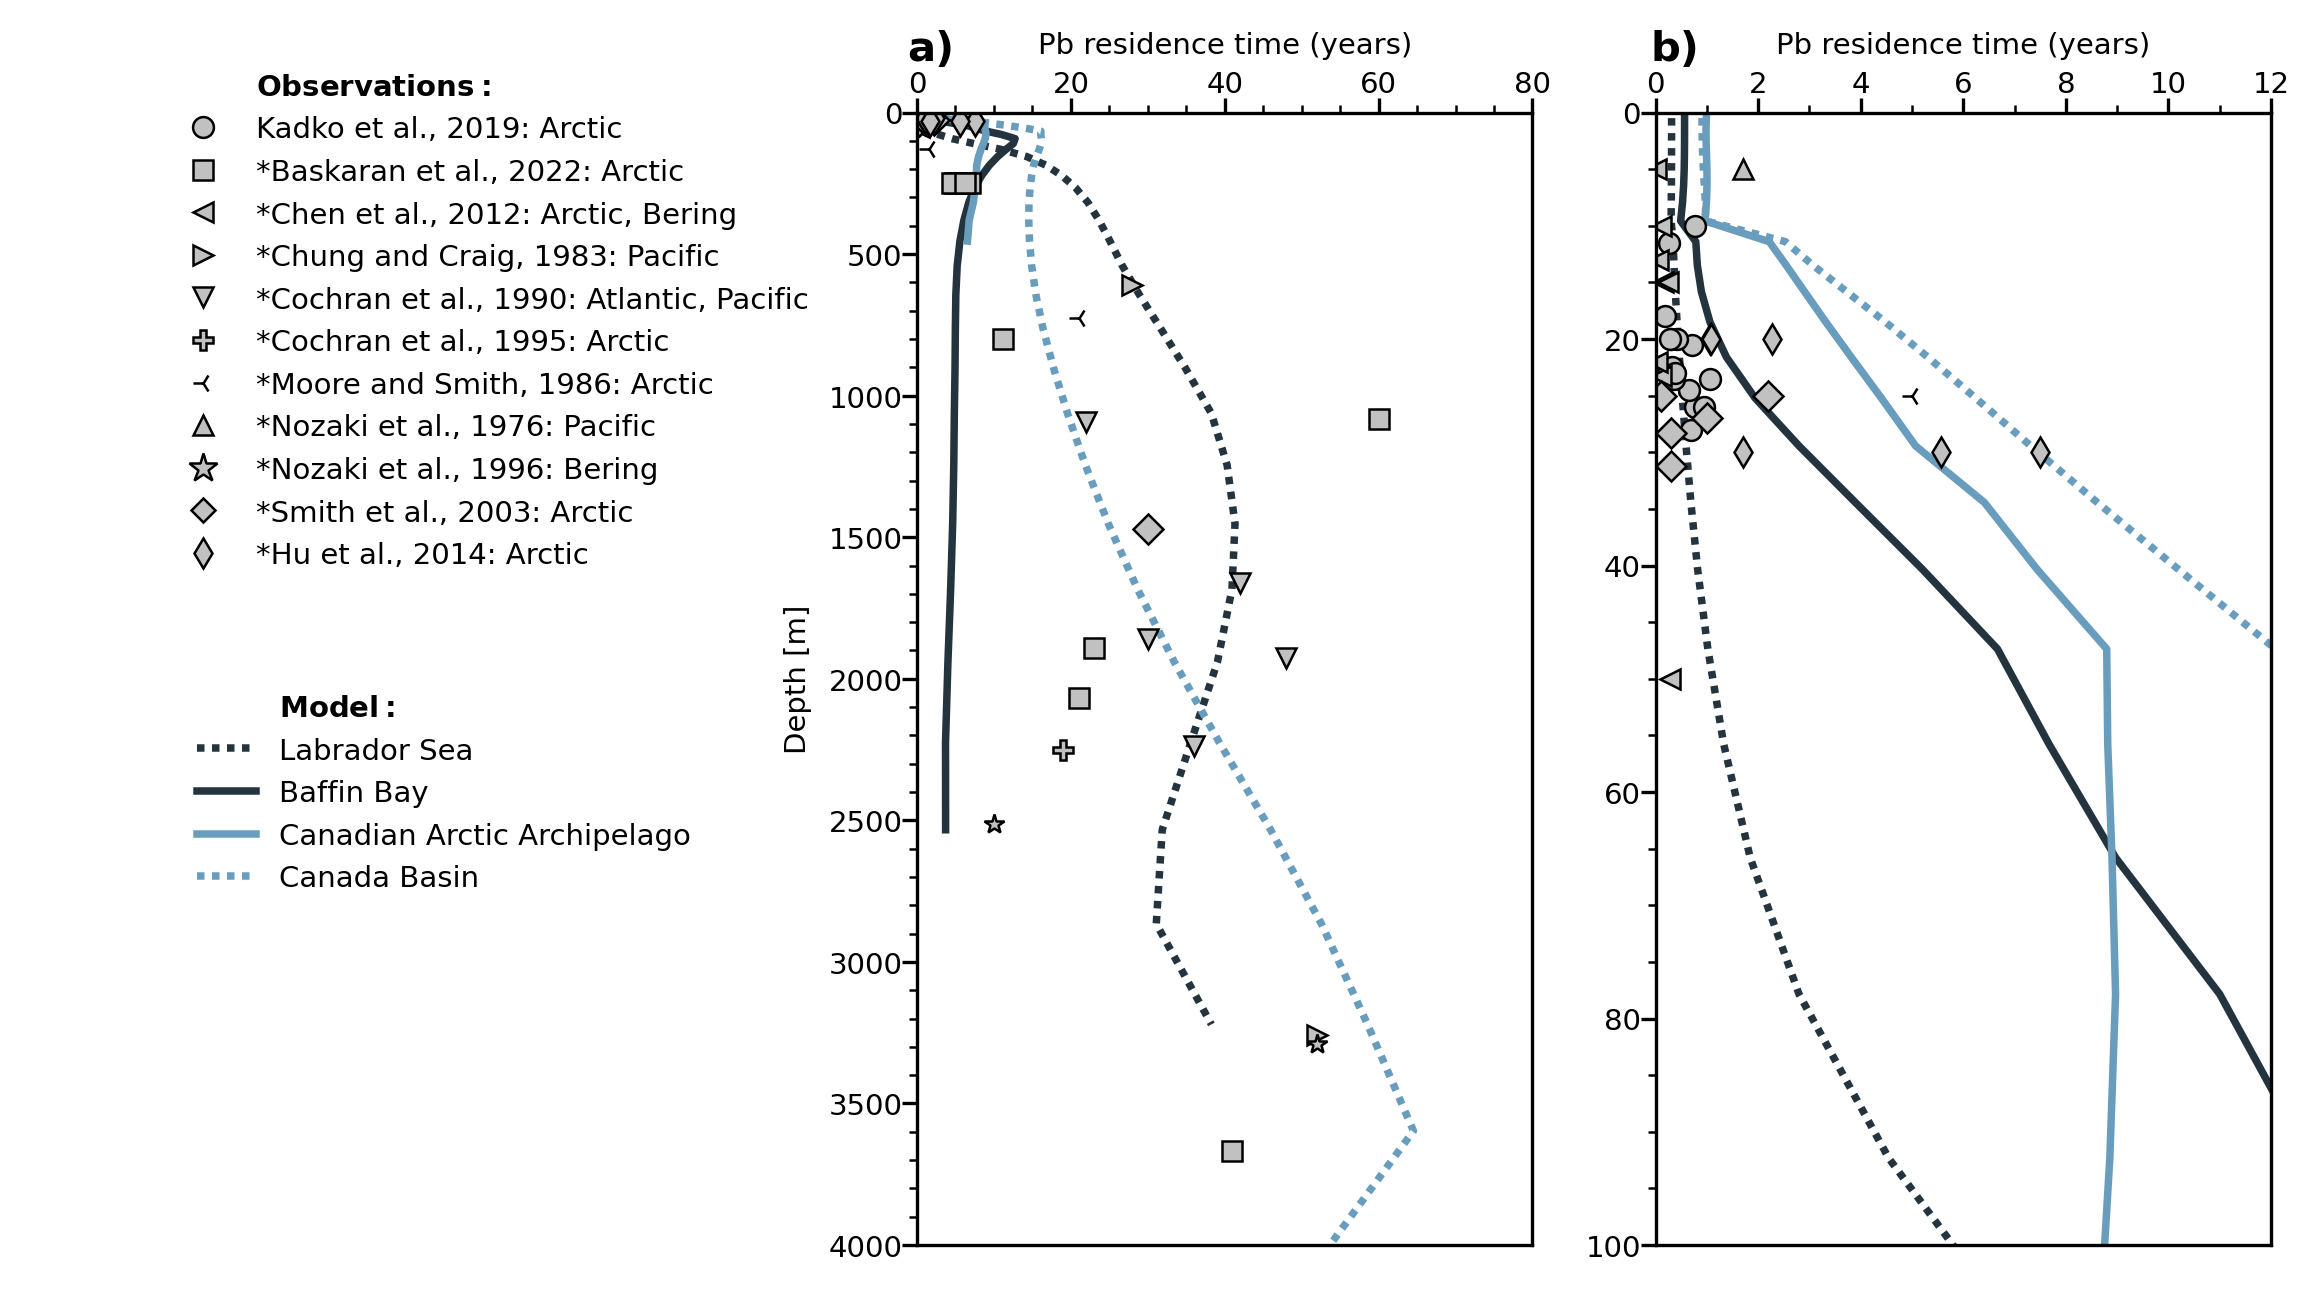

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(9,5), dpi=300)
ax[0].axis('off')

color_g  = '#c1c1c1'
markers  = ["o","s","<",">","v","P","3","^","*","D", "d"]

#------------- Vertical profile ----------------
ax[1].set_ylabel('Depth [m]', fontsize=7)
for axis in [ax[1], ax[2]]:
    axis.set_xlabel('Pb residence time (years)', fontsize=7)
    axis.xaxis.tick_top()
    axis.xaxis.set_label_position('top') 
    axis.yaxis.set_minor_locator(MultipleLocator(100))
    axis.xaxis.set_minor_locator(MultipleLocator(5))
    
plot_regional(ax[1], ts_regional_restime, color_regions, legend=True)
plot_regional(ax[2], ts_regional_restime, color_regions, legend=False)

ax[2].xaxis.set_minor_locator(MultipleLocator(1))
ax[2].yaxis.set_minor_locator(MultipleLocator(5))
ax[1].set_ylim(4000,0);
ax[2].set_ylim(100,0);     
ax[1].set_xlim(0,80)
ax[2].set_xlim(0,12)

# Observations: --------------------------------------------------------------------------
kwargs={'markeredgecolor':'k', 'markeredgewidth':0.6, 'markersize':5, 'linestyle':'', 'color':color_g}
for axis in [ax[1],ax[2]]:
    axis.plot(kadko_res             , kadko_ave_depth         , marker=markers[0], **kwargs)
    axis.plot(baskaran_2022_restime , baskaran_2022_ave_depth , marker=markers[1], **kwargs)
    axis.plot(chen_res              , chen_ave_depth          , marker=markers[2], **kwargs)
    axis.plot(Chung_restime         , Chung_ave_depth         , marker=markers[3], **kwargs)
    axis.plot(Cochran_1990_restime  , Cochran_1990_ave_depth  , marker=markers[4], **kwargs)
    axis.plot(Cochran_1995_restime  , Cochran_1995_ave_depth  , marker=markers[5], **kwargs)
    axis.plot(MS_restime            , MS_ave_depth            , marker=markers[6], **kwargs)
    axis.plot(nozaki_restime        , nozaki_ave_depth        , marker=markers[7], **kwargs)
    axis.plot(Nozaki_1996_restime   , Nozaki_1996_ave_depth   , marker=markers[8], **kwargs)
    axis.plot(smith_restime         , smith_ave_depth         , marker=markers[9], **kwargs)
    axis.plot(wangjiang_2014_restime, wangjiang_2014_ave_depth, marker=markers[10], **kwargs)

leg1 = create_legend_sources(ax[1], markers, loc_leg=(0.07,0.55))

fig.text(0.395, 0.915, 'a)', fontsize=10, weight='bold');
fig.text(0.670, 0.915, 'b)', fontsize=10, weight='bold');
    
fig.savefig(f'{path_figure}R5-residence-time.jpg', bbox_inches='tight', dpi=300)